In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df_unidade_consumidora = pd.read_csv('./datasets/unidade_consumidora')
df_geracao = pd.read_csv('./datasets/geracao', chunksize=1000000)
df_usina = pd.read_csv('./datasets/usina')
df_cidade = pd.read_csv('./datasets/cidade')
df_endereco = pd.read_csv('./datasets/endereco')
df_estado = pd.read_csv('./datasets/estado')
df_id_ext = pd.read_csv('./datasets/id_ext')
df_usina_historico = pd.read_csv('./datasets/usina_historico')

In [4]:
# Removendo os dados ausentes da coluna potencia
df_usina.dropna(subset=['potencia'], inplace=True)

# Removendo a coluna last_plant_history_id
df_usina.drop(columns=['last_plant_history_id'], inplace=True)

In [5]:
# Selecionando 100000 dados de amostra
df_usina_amostra = df_usina.sample(n=25000, random_state=42)

# IDs usinas
ids_usinas_amostra = df_usina_amostra['id'].tolist()

In [6]:
geracao_filtrada = []

for chunk in df_geracao:
    # Filtrar dados de geracao das usinas amostra
    chunk_filtrado = chunk[chunk['id_usina'].isin(ids_usinas_amostra)]

    # Adicionar o chunk filtrado à lista
    geracao_filtrada.append(chunk_filtrado)

# Concatenar todos os chunks filtrados em um único DataFrame
df_geracao_filtrada = pd.concat(geracao_filtrada, ignore_index=True)

In [7]:
df_geracao_filtrada.dropna(subset=['quantidade', 'prognostico'], inplace=True)

In [9]:
df_cidade.rename(columns={'nome': 'nome_cidade'}, inplace=True, errors='ignore')
df_cidade.drop(columns=['created_at'], inplace=True, errors='ignore')

df_usina_historico.drop(columns=['performance_type_enum'], inplace=True, errors='ignore')
df_usina_historico.dropna(subset=['performance'], inplace=True)

df_unidade_consumidora.dropna(subset=['id_endereco'], inplace=True)

df_endereco.dropna(subset=['id_cidade'], inplace=True)

In [10]:
# Unir usina com unidade_consumidora
df = df_usina_amostra.merge(df_unidade_consumidora, left_on='unidade_consumidora_id', right_on='id', how='inner', suffixes=('', '_unidade_consumidora'))
df.drop(columns=['id_unidade_consumidora'], inplace=True)

# Unir unidade_consumidora com endereço
df = df.merge(df_endereco, left_on='id_endereco', right_on='id', how='inner', suffixes=('', '_endereco_2'))
df.drop(columns=['id_endereco_2'], inplace=True)
df['id_endereco'] = df['id_endereco'].astype(int)

# Unir endereço com cidade
df = df.merge(df_cidade, left_on='id_cidade', right_on='id', how='inner', suffixes=('', '_cidade_2'))
df.drop(columns=['id_cidade_2'], inplace=True)
df['id_cidade'] = df['id_cidade'].astype(int)

# Unir cidade com estado
df = df.merge(df_estado, left_on='id_estado', right_on='id', how='inner', suffixes=('', '_estado_2'))
df.drop(columns=['id_estado_2'], inplace=True)

# Unir usina com usina_historico para obter potência histórica
df = df.merge(df_usina_historico, left_on='id', right_on='plant_id', how='inner', suffixes=('', '_usina_historico'))
df.drop(columns=['plant_id'], inplace=True)

# Unir geracao com df
df = pd.merge(df_geracao_filtrada, df, left_on='id_usina', right_on='id', how='inner', suffixes=('', '_geracao'))
df.drop(columns=['id_geracao'], inplace=True)

df.head()

,id,data,prognostico,quantidade,id_usina,potencia,unidade_consumidora_id,id_endereco,id_cidade,nome_cidade,id_estado,denominacao,uf,regiao,id_usina_historico,power,performance,start_date
0,3198427,2020-02-20,610.17,771.00,18297,146.20,20561,15584,3,Açu,20,Rio Grande do Norte,RN,Nordeste,74876,146.20,1681.00,2020-01-29 03:00:00
1,3141723,2020-08-24,14.21,0.00,8667,3.78,9256,5720,630,Santo Antônio de Jesus,5,Bahia,BA,Nordeste,42262,3.78,1612.00,2020-04-19 03:00:00
2,3141789,2020-08-24,97.92,0.00,2314,49.58,2477,11302,1573,Águas Formosas,13,Minas Gerais,MG,Sudeste,47566,49.58,1453.00,2019-05-13 03:00:00
3,3141835,2020-08-24,34.07,22.12,14784,9.52,16243,41158,616,Salvador,5,Bahia,BA,Nordeste,66328,9.52,1495.00,2020-02-01 03:00:00
4,33658,2019-08-25,32.77,45.80,155,10.88,249,1041,4173,Portão,21,Rio Grande do Sul,RS,Sul,41796,10.88,1375.32,2019-05-20 03:00:00


,id,data,prognostico,quantidade,id_usina,potencia,unidade_consumidora_id,id_endereco,id_cidade,nome_cidade,...,id_usina_historico,power,performance,start_date,geracao_media,prognostico_medio,desempenho_relativo,desempenho_medio_cidade,diferenca_relativa,classificacao
0,3198427,2020-02-20,610.17,771.00,18297,146.20,20561,15584,3,Açu,...,74876,146.20,1681.00,2020-01-29 03:00:00,771.00,610.17,1.263582,0.993045,1.272432,Acima do esperado
1,3141723,2020-08-24,14.21,0.00,8667,3.78,9256,5720,630,Santo Antônio de Jesus,...,42262,3.78,1612.00,2020-04-19 03:00:00,0.00,14.21,0.000000,inf,0.000000,Abaixo do esperado
2,3141789,2020-08-24,97.92,0.00,2314,49.58,2477,11302,1573,Águas Formosas,...,47566,49.58,1453.00,2019-05-13 03:00:00,0.00,97.92,0.000000,0.285242,0.000000,Abaixo do esperado
3,3141835,2020-08-24,34.07,22.12,14784,9.52,16243,41158,616,Salvador,...,66328,9.52,1495.00,2020-02-01 03:00:00,22.12,34.07,0.649252,inf,0.000000,Abaixo do esperado
4,33658,2019-08-25,32.77,45.80,155,10.88,249,1041,4173,Portão,...,41796,10.88,1375.32,2019-05-20 03:00:00,45.80,32.77,1.397620,0.791120,1.766634,Acima do esperado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738317,460516195,2024-11-10,12.99,0.10,33304,3.00,36142,481987,3164,Toledo,...,89871,3.00,1612.00,2020-08-30 00:00:00,0.10,12.99,0.007698,inf,0.000000,Abaixo do esperado
1738318,460517780,2024-11-10,30.54,0.00,10757,6.75,11391,513854,2606,Cajazeiras,...,47623,6.75,1612.00,2019-11-06 00:00:00,0.00,30.54,0.000000,inf,0.000000,Abaixo do esperado
1738319,460521849,2024-11-10,143.98,2.63,110876,33.22,125323,114205,4233,São Francisco de Paula,...,292022,33.22,1612.00,2021-08-08 00:00:00,2.63,143.98,0.018266,inf,0.000000,Abaixo do esperado
1738320,460522503,2024-11-10,48.93,3.10,91903,9.32,103278,72346,2771,Sousa,...,242402,9.32,1674.72,2021-02-21 00:00:00,3.10,48.93,0.063356,0.914392,0.069287,Abaixo do esperado


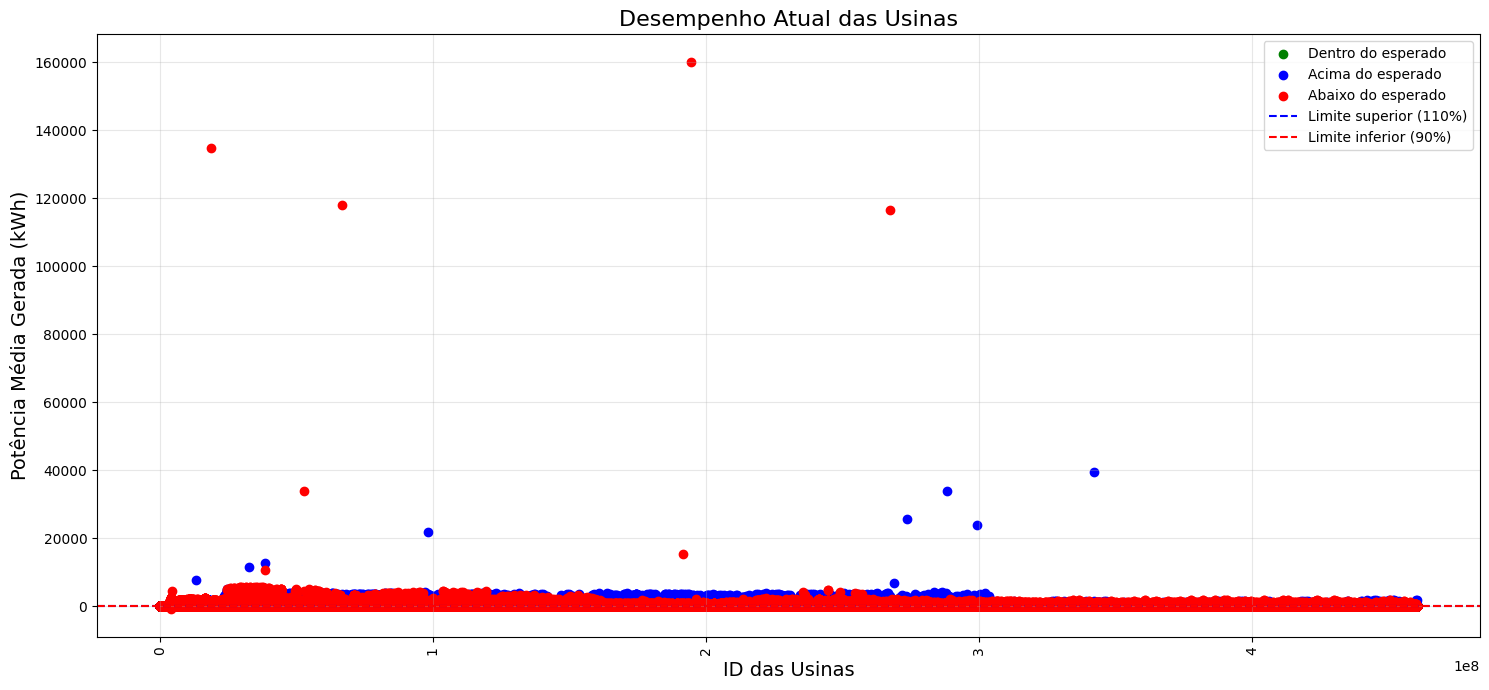

In [ ]:
# Agregação de geração média por usina
geracao_agg = (
    df.groupby("id")
    .agg({"quantidade": "mean", "prognostico": "mean"})
    .reset_index()
    .rename(columns={"quantidade": "geracao_media", "prognostico": "prognostico_medio"})
)

# Merge com as informações de potência e localização
dados = pd.merge(df, geracao_agg, left_on="id", right_on="id")

# Desempenho relativo em relação ao prognóstico
dados["desempenho_relativo"] = dados["geracao_media"] / dados["prognostico_medio"]

# Agregação de desempenho médio por cidade
desempenho_por_cidade = (
    dados.groupby("id_cidade")
    .agg({"desempenho_relativo": "mean"})
    .reset_index()
    .rename(columns={"desempenho_relativo": "desempenho_medio_cidade"})
)

dados = pd.merge(dados, desempenho_por_cidade, on="id_cidade")

# Diferença em relação ao desempenho médio da cidade
dados["diferenca_relativa"] = dados["desempenho_relativo"] / dados["desempenho_medio_cidade"]

def classificar_desempenho_com_localizacao(valor):
    if valor >= 0.9 and valor <= 1.1:
        return "Dentro do esperado"
    elif valor < 0.9:
        return "Abaixo do esperado"
    else:
        return "Acima do esperado"

dados["classificacao"] = dados["diferenca_relativa"].apply(classificar_desempenho_com_localizacao)

usinas_problema = dados[dados["classificacao"] != "Dentro do esperado"]
display(usinas_problema)

# Dados fictícios para demonstração
usinas_problema = dados[dados["classificacao"] != "Dentro do esperado"]

# Separar dados por classificação
usinas_acima = usinas_problema[usinas_problema["classificacao"] == "Acima do esperado"]
usinas_abaixo = usinas_problema[usinas_problema["classificacao"] == "Abaixo do esperado"]
usinas_dentro = dados[dados["classificacao"] == "Dentro do esperado"]

plt.figure(figsize=(15, 7))

usinas_dentro = usinas_dentro[usinas_dentro["geracao_media"] < 0]

# Plotar potência das usinas dentro do esperado
plt.scatter(
    usinas_dentro["id"], 
    usinas_dentro["geracao_media"], 
    color="green", 
    label="Dentro do esperado"
)

plt.scatter(
    usinas_acima["id"], 
    usinas_acima["geracao_media"], 
    color="blue", 
    label="Acima do esperado"
)
plt.scatter(
    usinas_abaixo["id"], 
    usinas_abaixo["geracao_media"], 
    color="red", 
    label="Abaixo do esperado"
)

y_min, y_max = plt.ylim()
plt.axhline(y=1.1, color="blue", linestyle="--", label="Limite superior (110%)")
plt.axhline(y=0.9, color="red", linestyle="--", label="Limite inferior (90%)")

plt.title("Desempenho Atual das Usinas", fontsize=16)
plt.xlabel("ID das Usinas", fontsize=14)
plt.ylabel("Potência Média Gerada (kWh)", fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()